<a href="https://colab.research.google.com/github/Pratiksha5050/Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SENTIMENT ANALYSIS - Sentiment analysis studies the subjective information in an
expression, that is, the opinions, appraisals, emotions, or attitudes towards a topic, person or
entity. Expressions can be classified as positive, negative, or neutral. For example: “I really like
the new design of your website!” → Positive.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

#1.import Restaurant Reviews Dataset 
df=pd.read_table(r"/content/drive/MyDrive/Restaurant_Reviews.tsv")
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   liked   2 non-null      int64
 1   review  2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes


In [ ]:
df.describe()

,liked,review
count,2.000000,2.000000
mean,0.500000,0.500000
std,0.707107,0.707107
min,0.000000,0.000000
25%,0.250000,0.250000
50%,0.500000,0.500000
75%,0.750000,0.750000
max,1.000000,1.000000


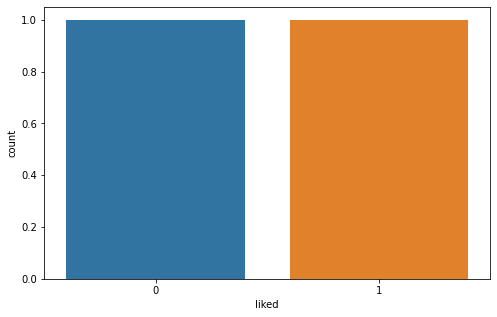

In [ ]:
#2.process the data and do visualizations (represent using matplotlib / seaborn the number of positive reviews and negative reviews)( ex-use a bar graph )
plt.figure(figsize=(8,5))
sns.countplot(x=df.liked);

In [ ]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
#3.create svc model and count vectorizer separately (method 1)
x=df['Review'].values
y=df['Liked'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
#View the Shapes of Train Sets and Test Sets
x_train.shape


(750,)

In [ ]:
x_test.shape


(250,)

In [ ]:
y_train.shape

(750,)

In [ ]:
y_test.shape

(250,)

In [ ]:
#Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

In [ ]:
#Import Support Vector Classifier(SVC)
from sklearn.svm import SVC
model=SVC()
#Train the Model
model.fit(x_train_vect,y_train)

SVC()

In [ ]:
#Predict the Test Results
y_pred=model.predict(x_test_vect)


In [ ]:
#Evaluate the Model
import numpy as np
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.72

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_vect,y_train)
y_pred = model.predict(x_test_vect)
accuracy_score(y_pred,y_test)

0.74

In [ ]:
#4.(method 2) create a pipeline with Vectorization model and ML algorithm to predict the final sentiment.
# PIPELINE (combines two estimators = svc+countvectorizer)
# we use pipeline so that we need not vectorize the text every time we want to predict the output 
from sklearn.pipeline import make_pipeline 

model2 = make_pipeline(CountVectorizer(),SVC())

model2.fit(x_train,y_train) 

y_pred2 = model2.predict(x_test)
y_pred2

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred2,y_test)

0.792

In [ ]:
#5.create NB model and count vectorizer separately (method 1)
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model3 = MultinomialNB() 

In [ ]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [ ]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.744

In [ ]:
#6.(method 2) create a pipeline with Vectorization model and ML algorithm to predict the final sentiment for the multinomialNB and CountVectorizer

# PIPELINE WITH MultinomialNB 
# PIPELINE (combines two estimators = MultinomialNB+countvectorizer)
# we use pipeline so that we need not vectorize the text every time we want to predict the output 
from sklearn.pipeline import make_pipeline 

model4 = make_pipeline(CountVectorizer(),MultinomialNB())

model4.fit(x_train,y_train) 

y_pred4 = model4.predict(x_test)
y_pred4

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred4,y_test)

0.784

In [ ]:
# # ACCURACY SCORES FOR ALL 4 MODELS 
# SVC                       - 0.72
# SVC pipeline              - 0.792
# MultinomialNB             - 0.744
# MultinomialNB pipeline    - 0.784

In [ ]:
#7.Use joblib to create and save it as a model (USE THE MODEL WITH THE HIGHEST ACCURACY)(joblib is similar to pickle)
import joblib 
joblib.dump(model4,'spam-ham') #create a file for the best model to be used for predictions

['spam-ham']

In [ ]:
import joblib 
text_model = joblib.load('spam-ham')   #reloading the created joblib model for predictions 
text_model

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
#8.Using the new model created using joblib, predict the output of a new review
text_model.predict(["I Love this "]) 

array([1])

In [ ]:
#Sentiment Analysis and Twitter analysis


#Sentiment analysis systems help organizations gather insights from unorganized and unstructured text that comes from online sources such as emails, blog posts, support tickets, web chats, social media channels, forums and comments. 
#Algorithms replace manual data processing by implementing rule-based, automatic or hybrid methods. 
#Rule-based systems perform sentiment analysis based on predefined, lexicon-based rules while automatic systems learn from data with machine learning techniques. 

#Twitter sentiment analysis allows you to keep track of what's being said about your product or service on social
#media, and can help you detect angry customers or negative mentions before they they escalate.